In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

import keras.backend as K
from keras.models import load_model

C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [3]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Val'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for validation: %d' % nb_images)

#Normalise images
images = np.array(images)
images /= 255.0

Loaded Images and labels for validation: 60


In [4]:
model = load_model("model.h5")

In [5]:
#print(model.to_json())

In [6]:
# Get predictions
all_preds = model.predict(images)
    
loc_preds = []
for elem in all_preds:
    loc_preds.append(np.argmax(elem))

In [7]:
res = 0

i_0 = 1
res_0 = 0
res_0_1 = 0
res_0_2 = 0
res_0_3 = 0
res_0_4 = 0

i_1 = 1
res_1 = 0
res_1_1 = 0
res_1_2 = 0
res_1_3 = 0

i_2 = 1
res_2 = 0
res_2_1 = 0
res_2_2 = 0

i_3 = 1
res_3 = 0
res_3_1 = 0
res_3_2 = 0
res_3_3 = 0

i_4 = 1
res_4 = 0
res_4_1 = 0
res_4_2 = 0
res_4_3 = 0
res_4_4 = 0

for value in labels_loc:
    if value == 0:
        i_0 += 1
    elif value == 1:
        i_1 += 1
    elif value == 2:
        i_2 += 1
    elif value == 3:
        i_3 += 1
    elif value == 4:
        i_4 += 1

for i, value in enumerate(loc_preds):
    if value != labels_loc[i]:
        res += 1
        if labels_loc[i] == 0:    
            res_0 += 1
            if abs(labels_loc[i] - value) == 1:
                res_0_1 += 1
            elif abs(labels_loc[i] - value) == 2:
                res_0_2 += 1
            elif abs(labels_loc[i] - value) == 3:
                res_0_3 += 1
            elif abs(labels_loc[i] - value) == 4:
                res_0_4 += 1
        elif labels_loc[i] == 1:
            res_1 += 1
            if abs(labels_loc[i] - value) == 1:
                res_1_1 += 1
            elif abs(labels_loc[i] - value) == 2:
                res_1_2 += 1
            elif abs(labels_loc[i] - value) == 3:
                res_1_3 += 1
        elif labels_loc[i] == 2:
            res_2 += 1
            if abs(labels_loc[i] - value) == 1:
                res_2_1 += 1
            elif abs(labels_loc[i] - value) == 2:
                res_2_2 += 1
        elif labels_loc[i] == 3:
            res_3 += 1
            if abs(labels_loc[i] - value) == 1:
                res_3_1 += 1
            elif abs(labels_loc[i] - value) == 2:
                res_3_2 += 1
            elif abs(labels_loc[i] - value) == 3:
                res_3_3 += 1
        elif labels_loc[i] == 4:
            res_4 += 1
            if abs(labels_loc[i] - value) == 1:
                res_4_1 += 1
            elif abs(labels_loc[i] - value) == 2:
                res_4_2 += 1
            elif abs(labels_loc[i] - value) == 3:
                res_4_3 += 1
            elif abs(labels_loc[i] - value) == 4:
                res_4_4 += 1

print(i, res, res_0, i_0, res_1, i_1, res_2, i_2, res_3, i_3, res_4, i_4)        
print("total error = " + str(res/i), "0_error = " + str(res_0/i_0), "1_error = " + str(res_1/i_1), "2_error = " + str(res_2/i_2), "3_error = " + str(res_3/i_3), "4_error = " + str(res_4/i_4), )

59 7 0 16 7 12 0 10 0 11 0 16
total error = 0.11864406779661017 0_error = 0.0 1_error = 0.5833333333333334 2_error = 0.0 3_error = 0.0 4_error = 0.0


Text(0.5,1,'Mean Errors by direction')

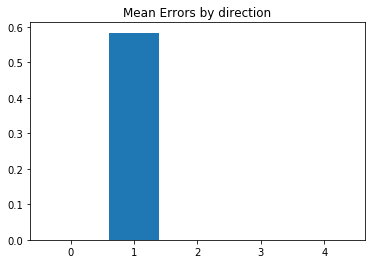

In [8]:
x = ['0','1','2','3','4']
plt.bar(x, height= [res_0/i_0, res_1/i_1, res_2/i_2, res_3/i_3, res_4/i_4])
plt.xticks(x, ['0','1','2','3','4']);
plt.title("Mean Errors by direction")

In [9]:
x = ['1','2','3','4']
plt.bar(x, height= [res_0_1/res_0, res_0_2/res_0, res_0_3/res_0, res_0_4/res_0])
plt.xticks(x, ['1','2','3','4']);
plt.title("0 Errors")

ZeroDivisionError: division by zero

Text(0.5,1,'1 Errors')

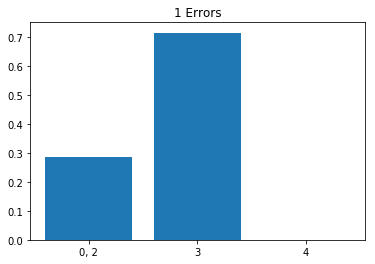

In [10]:
x = ['1','2','3']
plt.bar(x, height= [res_1_1/res_1, res_1_2/res_1, res_1_3/res_1])
plt.xticks(x, ['0, 2','3', '4']);
plt.title("1 Errors")

In [11]:
x = ['1','2']
plt.bar(x, height= [res_2_1/res_2, res_2_2/res_2])
plt.xticks(x, ['1, 3','0, 4']);
plt.title("2 Errors")

ZeroDivisionError: division by zero

In [12]:
x = ['1','2','3']
plt.bar(x, height= [res_3_1/res_3, res_3_2/res_3, res_3_3/res_3])
plt.xticks(x, ['2, 4','1', '0']);
plt.title("3 Errors")

ZeroDivisionError: division by zero

In [13]:
x = ['1','2','3','4']
plt.bar(x, height= [res_4_1/res_4, res_4_2/res_4, res_4_3/res_4, res_4_4/res_4])
plt.xticks(x, ['3','2','1','0']);
plt.title("4 Errors")

ZeroDivisionError: division by zero